Akurasi: 0.97
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



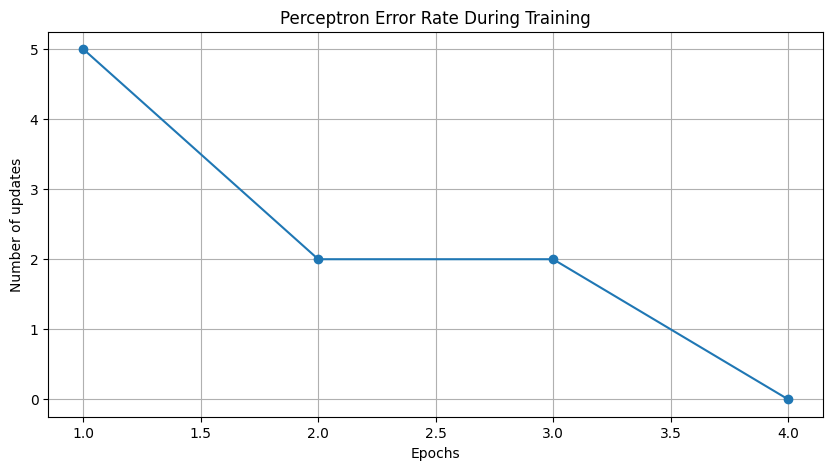

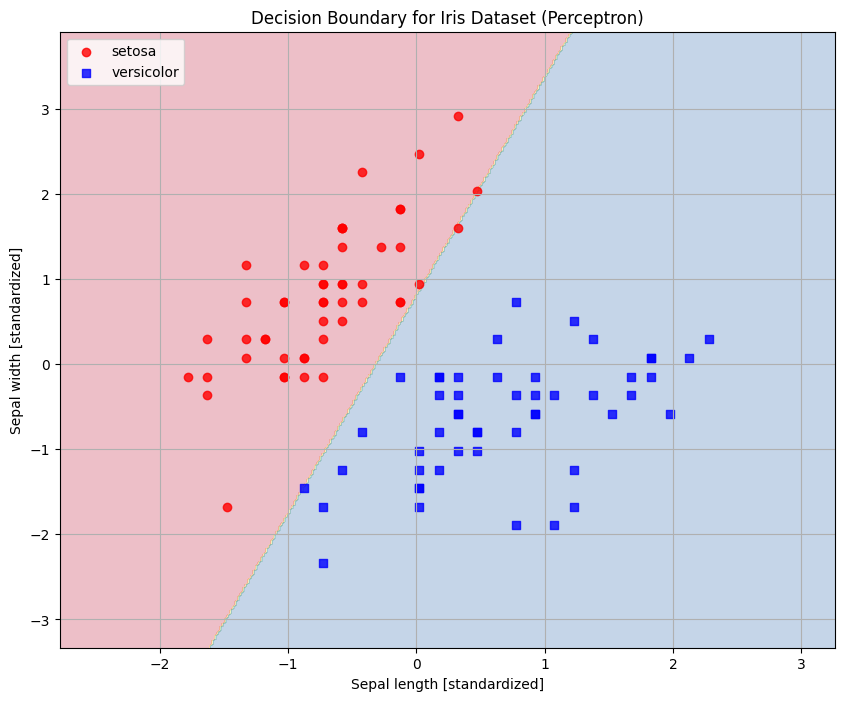

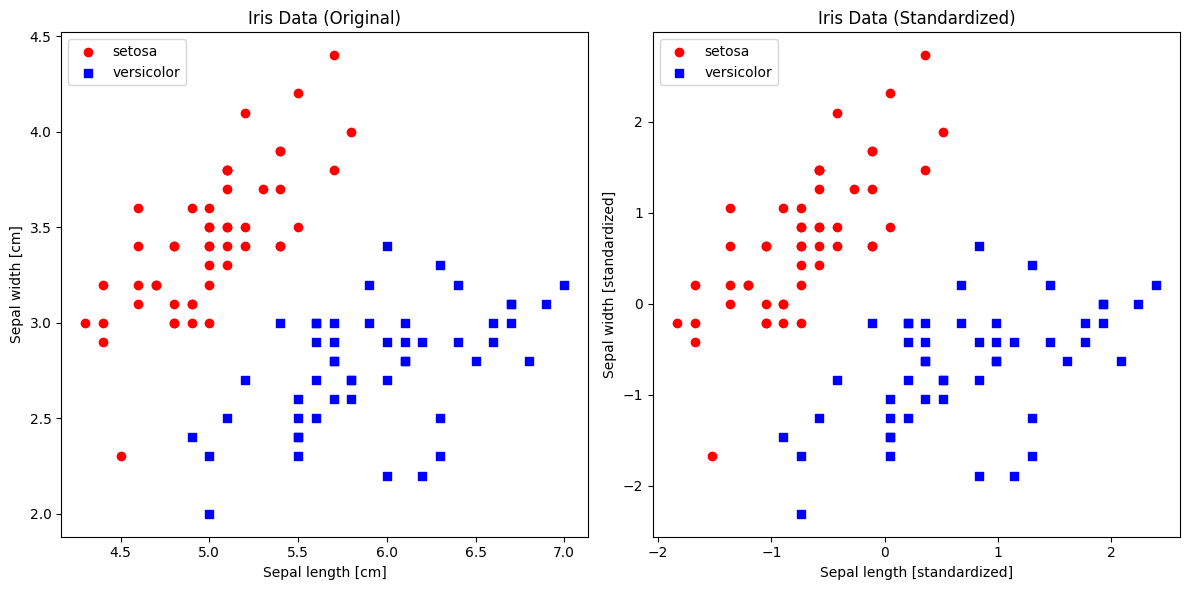

Program Perceptron untuk dataset Iris telah selesai!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []
        
    def fit(self, X, y):

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        self.errors_ = []

        for _ in range(self.n_iterations):
            errors = 0
            
            for xi, target in zip(X, y):

                update = self.learning_rate * (target - self.predict(xi))                

                self.weights += update * xi
                self.bias += update

                errors += int(update != 0.0)

            self.errors_.append(errors)

            if errors == 0:
                break
                
        return self
    
    def net_input(self, X):

        return np.dot(X, self.weights) + self.bias
    
    def predict(self, X):

        return np.where(self.net_input(X) >= 0.0, 1, 0)

iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train_std, y_train)

y_pred = perceptron.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi: {accuracy:.2f}")
print("Laporan Klasifikasi:")
print(report)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Error Rate During Training')
plt.grid(True)
plt.savefig('error_rate.png')
plt.show()

def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('o', 's')
    colors = ('red', 'blue')
    cmap = plt.cm.Spectral

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1],
                   alpha=0.8, 
                   c=[colors[idx]],
                   marker=markers[idx], 
                   label=iris.target_names[cl])
    
    plt.xlabel('Sepal length [standardized]')
    plt.ylabel('Sepal width [standardized]')
    plt.legend(loc='upper left')
    plt.title('Decision Boundary for Iris Dataset (Perceptron)')
    plt.grid(True)
    plt.savefig('decision_boundary.png')
    plt.show()

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=perceptron)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Sepal width [cm]')
plt.legend(loc='upper left')
plt.title('Iris Data (Original)')

plt.subplot(1, 2, 2)
X_std = sc.fit_transform(X)
plt.scatter(X_std[:50, 0], X_std[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X_std[50:100, 0], X_std[50:100, 1], color='blue', marker='s', label='versicolor')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Sepal width [standardized]')
plt.legend(loc='upper left')
plt.title('Iris Data (Standardized)')
plt.tight_layout()
plt.savefig('iris_visualization.png')
plt.show()

print("Program Perceptron untuk dataset Iris telah selesai!")